## Homework 2

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv

In [2]:
#prevent scientific notations
np.set_printoptions(suppress=True)

### Exercise 1

Generating the data based on the given model

In [3]:
# Generate data
mean = [0,0]
cov = [[1,0],[0,1]]

X = np.random.multivariate_normal(mean,cov,200)

#Define the the model
def f(X,theta):
    return theta[0] + theta[1]*X[:,0] + theta[2]*X[:,1]+ theta[3]*X[:,0]*X[:,1]

theta = [3,2,1,1]
y = f(X,theta)
y = y + np.random.normal(0,np.sqrt(0.05),len(X))

Now we will ignore the model and try to find the Vector $θ$, by utilizing the LSE criterion.

Knowing that $θ = {(X^T X)}^{-1}{X^T} y$, we need to calculate:
* $X$
* $X^T$
* $(X^T X)^{-1}$

For $X$ matrix:

In [4]:
#create X matrix
X0 = np.ones((200, 1))
X1X2 = X[:,0]*X[:,1]
X = np.hstack((X0, X, X1X2[:, np.newaxis]))
X

array([[ 1.        ,  0.11137662, -1.23466451, -0.13751276],
       [ 1.        ,  0.42314539,  1.01482338,  0.42941783],
       [ 1.        , -1.67939815, -1.75560668,  2.94836261],
       [ 1.        ,  1.3608626 ,  0.45845111,  0.62388897],
       [ 1.        , -0.67081639, -0.0759194 ,  0.05092798],
       [ 1.        , -0.25533097,  0.58575226, -0.14956069],
       [ 1.        ,  0.26326188,  0.43335279,  0.11408527],
       [ 1.        , -0.0256978 ,  0.43046997, -0.01106213],
       [ 1.        ,  0.43071759, -0.504795  , -0.21742409],
       [ 1.        ,  0.05227249,  0.31938596,  0.0166951 ],
       [ 1.        ,  1.84246417,  1.8464107 ,  3.40194556],
       [ 1.        , -1.08523028,  0.26191011, -0.28423279],
       [ 1.        ,  1.37074506,  0.72752975,  0.99725782],
       [ 1.        , -0.46528869,  2.38055787, -1.10764665],
       [ 1.        , -0.7960265 , -0.49232457,  0.3919034 ],
       [ 1.        , -0.20317426,  0.31337791, -0.06367033],
       [ 1.        ,  0.

For $X^T$ matrix:

In [5]:
#creating an "empty" array
XT = np.zeros((4, 200))

In [6]:
#find transpose of X
for i in range(0, len(X)):
    for j in range(0, len(X[0])):
        XT[j][i] = X[i][j]
XT.shape

(4, 200)

For $(X^T X)^{-1}$ matrix:

In [7]:
#create the XTX matrix
XTX = XT.dot(X)
XTX.shape

(4, 4)

In [8]:
#find inversed matrix of XTX
invXTX = inv(XTX)
invXTX.shape

(4, 4)

Finally, let's calculate the theta vector

In [9]:
theta_estimated = (invXTX.dot(XT)).dot(y)

In [10]:
theta_estimated

array([2.99713987, 1.97799976, 0.99592521, 0.98525395])

We can observe that theta values are really close to the real theta values that generated the data.

### Exercise 2

Generating the data based on the given model

In [11]:
# Generate data
X = np.random.uniform(-2, 2, size = (2000, 2))

In [12]:
#calculate y
y = []
rule = 0
for i in range(len(X)):
    rule = (X[i][1])**2 - (X[i][0])**2
    y.append(1) if rule>=0 else y.append(-1)

Plot data. Each class is a different color.

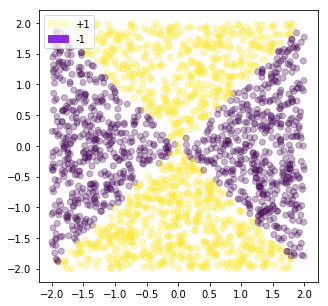

In [13]:
#plot the data points
import matplotlib.patches as mpatches

#plot
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], alpha = 0.3, c = y)

#legend
yellow_p = mpatches.Patch(color = 'LemonChiffon', label = '+1')
purple_p = mpatches.Patch(color = 'BlueViolet', label = '-1')
plt.legend(handles = [yellow_p,purple_p])

plt.show()

Apply transformation to X

In [14]:
X_squared = np.square(X)

And now plotting the data again.

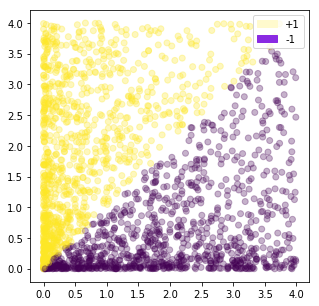

In [15]:
#plot
fig1 = plt.figure(figsize =(5, 5))
ax1 = fig1.add_subplot(111)
ax1.scatter(X_squared[:,0], X_squared[:,1], alpha = 0.3, c = y)

#legend
yellow_p = mpatches.Patch(color = "LemonChiffon", label = "+1")
purple_p = mpatches.Patch(color = "BlueViolet", label = "-1")
plt.legend(handles = [yellow_p,purple_p])
plt.show()

Data now is linearly seperable.

As we did before we will calculate the values of Vector $θ$.

For $X$ matrix:

In [16]:
#adding the column of ones
X0 = np.ones((2000, 1))
X_squared = np.hstack((X0, X_squared))

For $X^T$ matrix:

In [17]:
#transpose matrix
XT = np.zeros((3, 2000))
for i in range(0, len(X_squared)):
    for j in range(0, len(X_squared[0])):
        XT[j][i] = X_squared[i][j]
XT.shape

(3, 2000)

For $(X^T X)^{-1}$ matrix:

In [18]:
#XTX matrix
XTX = XT.dot(X_squared)

In [22]:
#inverted XTX
invXTX = inv(XTX)

Finally, let's calculate the theta vector

In [23]:
theta_estimated = (invXTX.dot(XT)).dot(y)

In [24]:
theta_estimated

array([ 0.08284334, -0.49356928,  0.44659933])